# Order finding  circuit

The algorithm is taken from arXiv:quant-ph/0205095

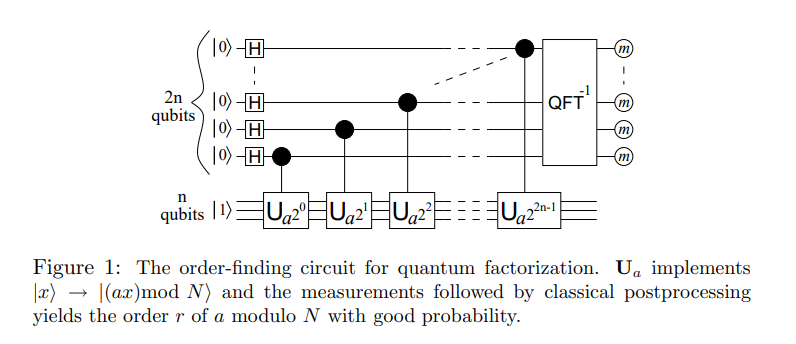

## Some explanations
This circuit is the phase estimation circuit. It calculates the phase of the operator Ua with 2 * n bit precision.
The input to the operator Ua should be an eigenstate of that operator. 
The phase \theta can be represented at a binary number from in the range between 0 and 1. \theta = a_1 / 2 + a_2 / 4 + a_3 / 8 + etc = 0.a_1 a_2 a_3 ... in binary numbers system.



## Importanty note 1
The N-number is the number that we try to factor. This number should not be even. 
Number a is a random number we try. For the Shor algorithm, this number should be less than N and should not have a common factor with N.

Based on this: 
1) There is no numbers to factor among 3-bits numbers (they all are either even or prime)
2) there are just two N-number to factor among 4-bits numbers - 9 or 15. 9 is a full square. So, lets use 15.
3) Then a should not be 3 or 5.

## Literature

1. https://cs.uwaterloo.ca/~watrous/QC-notes/QC-notes.10.pdf
2. arXiv:quant-ph/0205095
3. https://arxiv.org/pdf/quant-ph/9708016



In [2]:
import numpy as np
import time
import sys
import math
sys.path
sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes/Shor')
sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes/Library')

import qiskit
from qiskit import QuantumRegister as Q_R
from qiskit import ClassicalRegister as C_R
from qiskit_aer import Aer
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile


import quantum_routines as qr
import classical_routines as cr
import aux_func as af

In [39]:


bit_size = 4

cl_num_a = [1, 0, 1, 1]
cl_num_N = [1, 1, 1, 1]
CU_gate_input = [0, 0, 0, 1]
q_num_b =  [0, 0, 0, 0]

CU_gate_input = [0] + CU_gate_input
q_num_b = [0] + q_num_b



q_reg_search = Q_R(2 * bit_size, 's') # control qubit
q_reg_x = Q_R(bit_size + 1, 'x') # quantum number x
q_reg_b = Q_R(bit_size + 1, 'b') # quantum number b

q_anc = Q_R(1, 'ancilla') # ancilla qubit

cl_reg_meas = C_R(2 * bit_size, 'meas') #classical register for measured number

OFC_circ = qiskit.QuantumCircuit(q_reg_search, q_reg_x, q_reg_b, q_anc, cl_reg_meas)

#preparing superposition state for period search
for qq in q_reg_search:
    OFC_circ.h(qq)

#preparing quantum inputs to CQA_gates
OFC_circ = qr.qubit_binary_prepare(q_reg_x, CU_gate_input, OFC_circ)

#preparing quantum number b
OFC_circ = qr.qubit_binary_prepare(q_reg_b, q_num_b, OFC_circ)

cl_num_a_curr = []
cl_num_a_curr[:] = cl_num_a[:]

gate = qr.CQA_gate(bit_size, cl_num_a_curr, cl_num_N)
qubits = [q_reg_search[0]]
for i in range(bit_size + 1):
    qubits.append(q_reg_x[i])
for i in range(bit_size + 1):
    qubits.append(q_reg_b[i])
qubits.append(q_anc)
OFC_circ.append(gate, qubits)

for i in range(1, 2 * bit_size): #2 * bit_size
    #preparing a-number multiplied by 2^i
    for j in range(0, bit_size - 1):
        cl_num_a_curr[j] = cl_num_a_curr[j + 1]
    cl_num_a_curr[bit_size - 1] = 0
    
    # Adding a QCA_gate
    #print(bit_size)
    gate = qr.CQA_gate(bit_size, cl_num_a_curr, cl_num_N)
    qubits = [q_reg_search[i]]
    for i in range(bit_size + 1):
        qubits.append(q_reg_x[i])
    for i in range(bit_size + 1):
        qubits.append(q_reg_b[i])
    qubits.append(q_anc)

    
    OFC_circ.append(gate, qubits)
    
#OFC_circ.swap(0,7)
#OFC_circ.swap(1,6)
#OFC_circ.swap(2,5)
#OFC_circ.swap(3,4)

gate = qr.IQFTn_instr(2 * bit_size)
OFC_circ.append(gate, q_reg_search)

OFC_circ = qr.qubits_meas(q_reg_search, cl_reg_meas, OFC_circ)


#OFC_circ.draw('mpl')


Input parameters should be positive integer numebrs!
Input parameters should be positive integer numebrs!
Input parameters should be positive integer numebrs!
Input parameters should be positive integer numebrs!


['time elapsed: 8.60149884223938 sec']


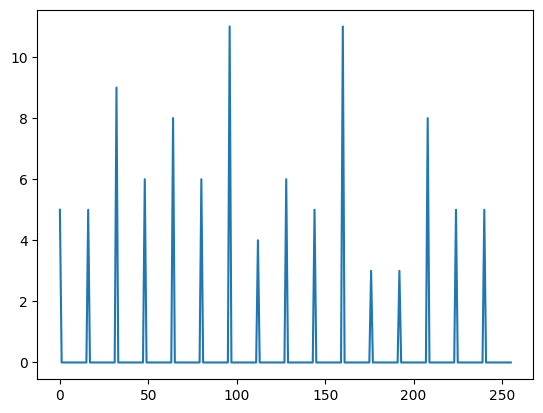

In [42]:
import time
#from qiskit.providers.basic_provider import BasicSimulator


start = time.time()
shot_num = 100
simulator = AerSimulator()

OFC_circ = transpile(OFC_circ, backend = simulator)
result = simulator.run(OFC_circ,shots = 100).result()
counts = result.get_counts(OFC_circ)
end = time.time()
print(['time elapsed: ' + str(end - start) + ' sec'])
af.plot_counts(counts, 2 * bit_size)

{'11110000': 5, '01100000': 11, '11100000': 5, '10010000': 5, '10100000': 11, '11000000': 3, '00110000': 6, '10000000': 6, '11010000': 8, '10110000': 3, '01000000': 8, '00010000': 5, '00100000': 9, '01010000': 6, '00000000': 5, '01110000': 4}


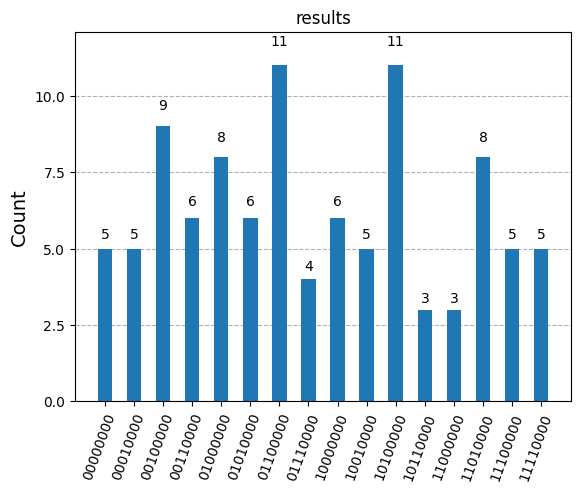

In [43]:
from qiskit.visualization import plot_histogram


print(counts)
plot_histogram(counts, title = 'results')